In [1]:
import numpy as np
import scipy.linalg
from scipy.stats import ortho_group
from scipy.io import loadmat
from localizer import Localizer
import psi4

#https://github.com/molmod/molmod
from molmod.units import angstrom, debye

import matplotlib.pyplot as plt

#importing the QM7 database
# data = dict(loadmat('../molecule_geometries/qm7.mat'))
# Z = data['Z'] # numbers
# R = data['R']/angstrom # positions in angstrom

#importing the centered QM7 database
# Z = np.load('../data/molecule_geometries/qm7_Z.npy')
# R = np.load('../data/molecule_geometries/qm7_R_centered.npy')

#final dataset
Z = np.load('../data/molecule_geometries/benchmarking_dataset_Z.npy')
R = np.load('../data/molecule_geometries/benchmarking_dataset_R.npy')
qm7_idxs = np.load('../data/molecule_geometries/benchmark_idxs.npy')

# Molecule order: H2O,CO2,HCN,Acetonitrile,H2SO4,Benzene,Diborane
numbers = np.load('../data/molecule_geometries/nuclei_numbers.npy')
positions = np.load('../data/molecule_geometries/positions.npy')

In [2]:
loc = Localizer(numbers[4],positions[4], check_import=False, cores=4, memory=6e+09)

generating data for: SO4H2
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
writing out psi4 data for molecule: SO4H2


In [13]:
idx = 6
loc = Localizer(Z[idx], R[idx], qm7_idxs[idx], check_import=False, cores=4, memory=6e+09, lot='scf')

generating data for: 0126_C5H6
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
writing out psi4 data for molecule: 0126_C5H6


In [14]:
data = loc.perform_sweep(p_min=0.,p_max=5., steps=30, scheme='V5', inc_pot=True)

Optimizing cost function: FB
Convergence: norm of riemann gradient below 10^-5
['V5', 0.0]
Optimizing cost function: V5
Convergence: norm of riemann gradient below 10^-5
Geometry data written to: ../data/xyz_files/local_runs/V5/0126_C5H6_V5_p_1.0_MIN_0.0_MAX_5.0_S_30.xyz
generating grid
Calculating QM ESP at the gridpoints
Saving QM ESP
Computing classical ESP
Valid points: 9188
['V5', 0.1724137931034483]
Optimizing cost function: V5
root out of range
Convergence: norm of riemann gradient below 10^-5
Geometry data written to: ../data/xyz_files/local_runs/V5/0126_C5H6_V5_p_1.0_MIN_0.0_MAX_5.0_S_30.xyz
generating grid
Potential data loaded
Computing classical ESP
Valid points: 9188
['V5', 0.3448275862068966]
Optimizing cost function: V5
root out of range
Convergence: norm of riemann gradient below 10^-5
Geometry data written to: ../data/xyz_files/local_runs/V5/0126_C5H6_V5_p_1.0_MIN_0.0_MAX_5.0_S_30.xyz
generating grid
Potential data loaded
Computing classical ESP
Valid points: 9188
['V5

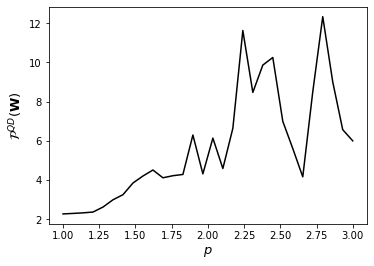

In [12]:
idx = 0
nonzero_idxs = np.where(np.array(data['V4CostVals']) < 0.)
penalty = np.array(data['PenaltyVals'])[nonzero_idxs]
cost_vals = -np.array(data['V4CostVals'])[nonzero_idxs]
dist_rmd = np.array(data['RootMeanDisplacement'])[nonzero_idxs]

fig, (ax1) = plt.subplots(1,1,figsize=(5.3,3.8))

lns1 = ax1.plot(penalty, cost_vals,c='k', label=r'$\mathcal{P}^{QD}(\mathbf{W})$')
ax1.set_ylabel(r'$\mathcal{P}^{QD}(\mathbf{W})$',fontsize=13)
ax1.set_xlabel('$p$', fontsize=13)
# ax1.hlines(0.1968902664591882,xmin=0., xmax=penalty[-1], color='red', linestyle='--')
# ax1.tick_params(axis='y', color='C0')
# ax1.set_yscale('log')

# ax2 = ax1.twinx()
# lns2 = ax2.plot(penalty,dist_rmd, c='C3', label='RMD')
# ax2.set_ylabel('RMSD ($\AA$)', fontsize=13, color='C3')
# ax2.set_ylim(0)

# leg = lns1 + lns2
# labs = [l.get_label() for l in leg]
# leg = ax2.legend(leg, labs, bbox_to_anchor=(0.5, 0., 0.5, 0.5), fontsize=13)

fig.tight_layout()
# plt.savefig('../data/figures/plots/hpc_run2/FB_p_sweep_hf_c5h6', dpi=350)

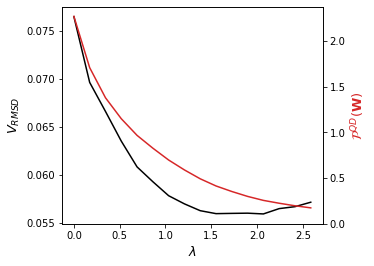

In [17]:
idx = 0
nonzero_idxs = np.where(np.array(data['V4CostVals']) < 0.)
penalty = np.array(data['PenaltyVals'])[nonzero_idxs]
cost_vals = -np.array(data['V4CostVals'])[nonzero_idxs]
esp_rmsd = np.array(data['ESPrmsd'])[nonzero_idxs]
dist_rmd = np.array(data['RootMeanDisplacement'])[nonzero_idxs]

fig, (ax1) = plt.subplots(1,1,figsize=(5.3,3.8))

lns1 = ax1.plot(penalty, esp_rmsd,c='k', label=r'$\mathcal{P}^{QD}(\mathbf{W})$')
ax1.set_ylabel(r'$V_{RMSD}$',fontsize=13)
ax1.set_xlabel('$\lambda$', fontsize=13)
# ax1.hlines(0.1968902664591882,xmin=0., xmax=penalty[-1], color='red', linestyle='--')
# ax1.tick_params(axis='y', color='C0')
# ax1.set_yscale('log')

ax2 = ax1.twinx()
lns2 = ax2.plot(penalty,cost_vals, c='C3', label='RMD')
ax2.set_ylabel(r'$\mathcal{P}^{QD}(\mathbf{W})$', fontsize=13, color='C3')
ax2.set_ylim(0)

# leg = lns1 + lns2
# labs = [l.get_label() for l in leg]
# leg = ax2.legend(leg, labs, bbox_to_anchor=(0.5, 0., 0.5, 0.5), fontsize=13)

fig.tight_layout()
# plt.savefig('../data/figures/plots/hpc_run2/V5_sweep_hf_esp_c5h6', dpi=350)

In [40]:
data['V4CostVals']

[-5.553602471038907,
 -4.187957599282505,
 -3.465916441948668,
 -2.68176690288891,
 -2.0466986643549823,
 -1.4936383792106134,
 -1.0612399736638272,
 -0.7892657927037857,
 -0.6154033601908088,
 -0.4909374176025914,
 -0.40239853574808354,
 -0.3379429085198091,
 -0.28781090098494555,
 -0.2460807518423941,
 -0.21340770578132998,
 -0.18686414059923123,
 -0.16486611037080318,
 -0.14710094887235525,
 -0.13525397540557407,
 -0.12434052152606984,
 -0.10837765839493269,
 -0.09922032580087368,
 -0.08984466366492874,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

## Parameter sweep using bondlengths for CO2

In [10]:
length = np.linspace(-0.03, 0.03, 15)
for l in length:
    p = np.zeros((3,3))
    p[0,0] = -l
    p[1,0] = l
    p += positions
    loc = Localizer(numbers, p)
    loc.optimize_line_search()
    loc.write_centers(append=True,filename='xyz_files/CO2_bond_sweep.xyz')

Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: no